# Filters
- Filtering is a neighborhood operation
- Certain image processing operations involve processing an image in sections, called blocks or neighborhoods, rather than processing the entire image at once. This is the case for filtering.

## For edge detection
- Edge detection works by detecting discontinuities in brightness.
- A common edge detection algorithm is **Sobel.**

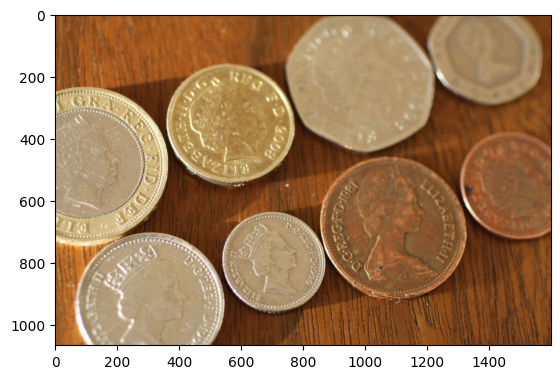

In [3]:
# Import images
import matplotlib.pyplot as plt
coins = plt.imread("coins.jfif")
plt.imshow(coins)

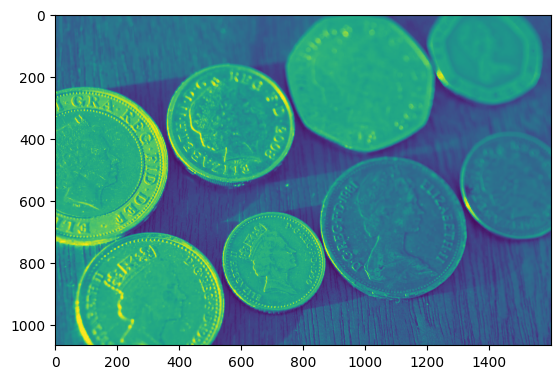

In [3]:
# Converting to grayscale
from skimage.color import rgb2gray

gray_coins = rgb2gray(coins)
plt.imshow(gray_coins)

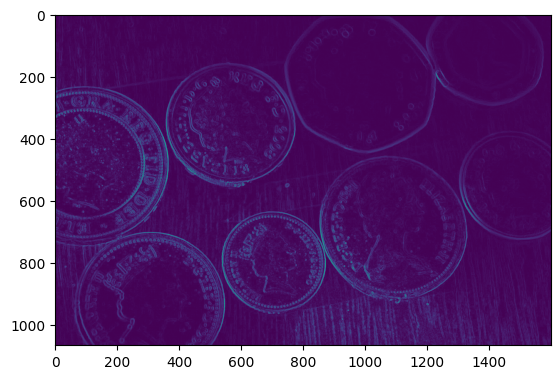

In [4]:
# Import edge detection algorithm
from skimage.filters import sobel

# Apply edge detection filter
edge_sobel = sobel(gray_coins)

# Visaulaize
plt.imshow(edge_sobel)

## For Gaussian Smoothing

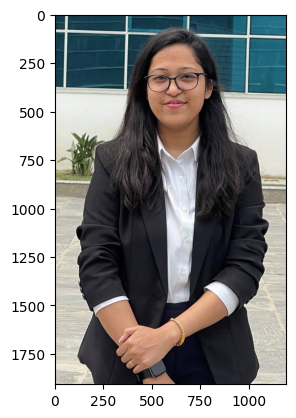

In [5]:
# Import the image for smoothing
my_image = plt.imread('./my_formal_pic.jpg')
plt.imshow(my_image)

In [6]:
# Comparing plots
def plot_comparison(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,6), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title("Original")
    
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis("off")

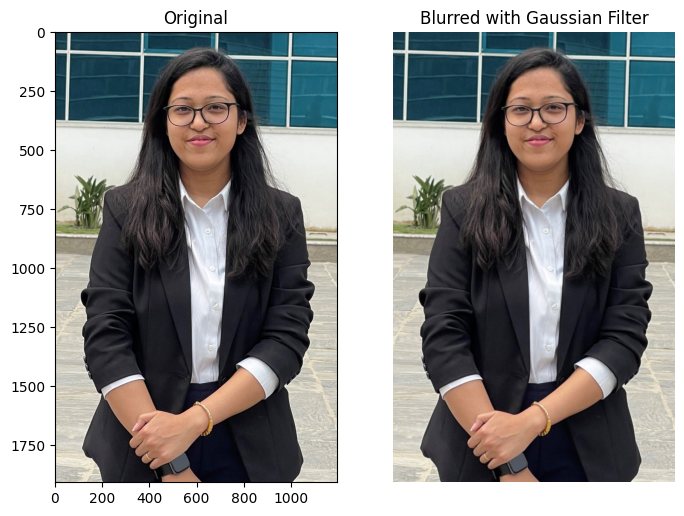

In [7]:
# Import Gaussian smoothing modules
from skimage.filters import gaussian

# Apply edge detection filter
gaussian_image = gaussian(my_image, multichannel = True)

# Visualize
plot_comparison(my_image, gaussian_image, "Blurred with Gaussian Filter")

# Contrast enhancement

![image-3.png](image-3.png)

- Image enhancement can be extremely useful in multiple areas. Often medical images like this X-ray can have low contrast, making it hard to spot important details. When we improve the contrast,the details become more visible. It's definitely easier to spot things on this one!

## Types:
1. Histogram equalization
2. Adaptive histogram equalization
3. Contrast Limited Adaptive Histogram Equalization (CLAHE)

# 1. Histogram equalization

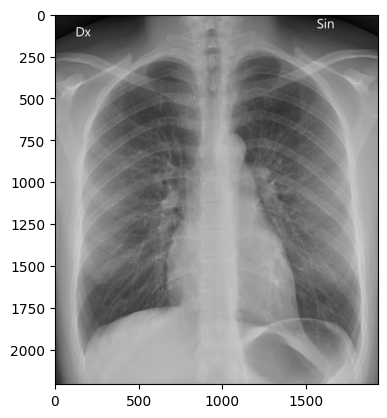

In [4]:
# Load the image 
xray = plt.imread('Xray.jfif')
plt.imshow(xray)

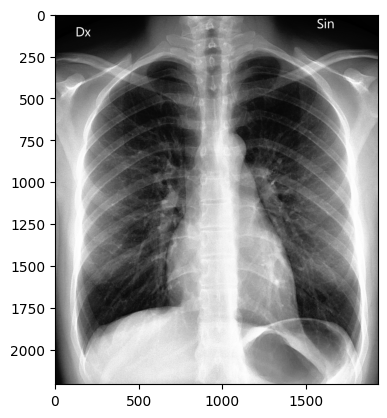

In [9]:
from skimage import exposure

# Obtain the equalized image
image_eq = exposure.equalize_hist(xray)

# Visualize
plt.imshow(image_eq)

# 2. CLAHE (Contrast Limited Adaptive Histogram Equalization)
- Developed to prevent over-amplification of noise that adaptive histogram equalization can give rise to.
- It doesnot taking the global histogram of the entire image, but operates on small regions called tiles or neighborhoods.

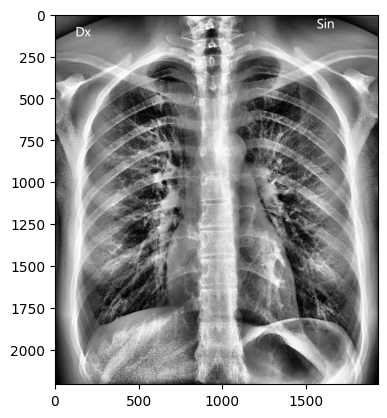

In [5]:
from skimage import exposure

# Apply adaptive equalization, clipping limit is normalized between 0 and 1 (higher values give more contrast)
image_adapteq = exposure.equalize_adapthist(xray, clip_limit=0.07)

# Visualize
plt.imshow(image_adapteq)

# Transformation 
- Prepare image for classification Machine Learning models
- Optimization and compression of images
- Save images with same proportion

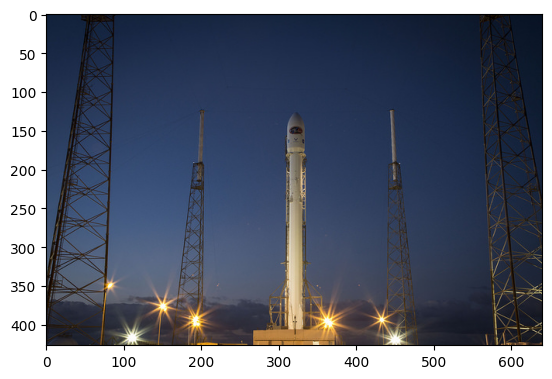

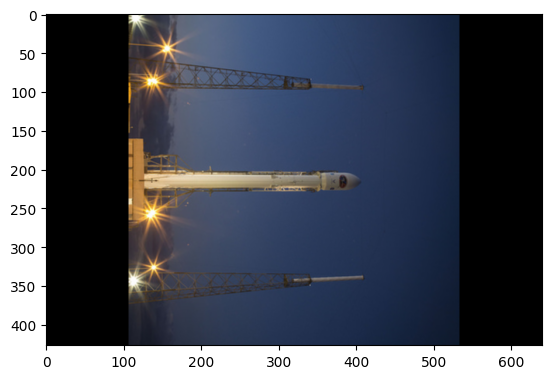

In [9]:
# Rotating images
from skimage import data
from skimage.transform import rotate

image = data.rocket()
plt.imshow(image)
plt.show()

# Rotate an image 90 degrees clockwise
image_rotated = rotate(image, -90)
plt.imshow(image_rotated)
plt.show()

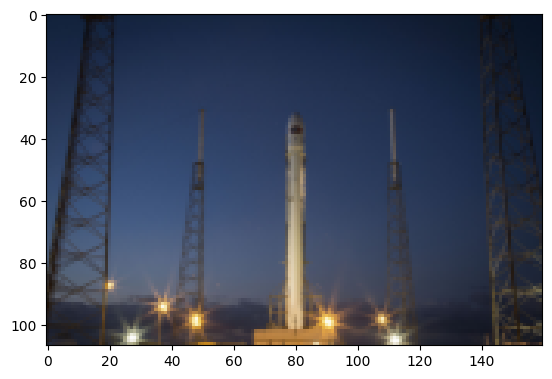

In [11]:
# Rescaling images
from skimage.transform import rescale

# Rescale the image to be 4 times smaller
image_rescaled = rescale(image, 1/4, 
                        anti_aliasing=True, #<-- for smoother transformation
                        multichannel=True)

plt.imshow(image_rescaled)

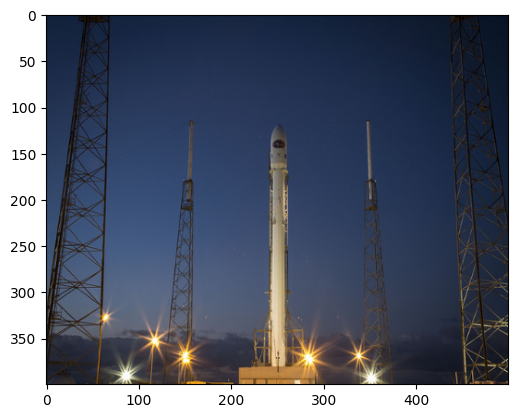

In [13]:
# Resizing images
from skimage.transform import resize

# Height and width to resize
height = 400
width = 500

# Resize imgae
image_resized = resize(image, (height,width), anti_aliasing=True)

plt.imshow(image_resized)

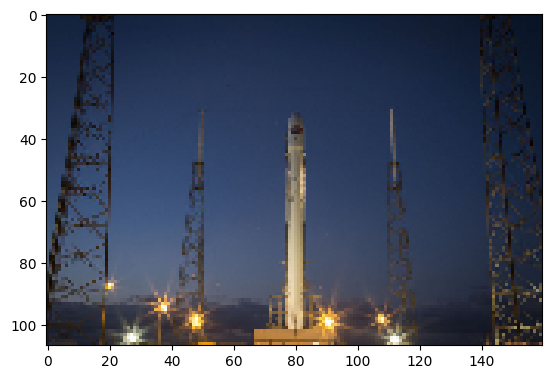

In [15]:
# Resize proportionally
from skimage.transform import resize

# Set proportional height so its 4 times its size
height = image.shape[0] / 4
width = image.shape[1] / 4

# Resize image
image_resized = resize(image, (height,width), anti_aliasing=False)

plt.imshow(image_resized)

# Morphology
- When you try to spot objects in an image, you can do so by its characteristics, like the shape. This what Morphology does.

## Morphological operations
- Dilation: Dilation adds pixels to the boundaries of objects in an image
- Erosion: Erosion removes pixels on object boundaries

![image-4](image-4.png)


In [17]:
# Shapes in scikit-image
from skimage import morphology

square = morphology.square(4)
square

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]], dtype=uint8)

## Erosion in scikit-image

In [23]:
# Load image
upper_r_image = plt.imread('r5.png')
upper_r_image.shape

(70, 80, 3)

In [24]:
# Convert to grayscale
from skimage.color import rgb2gray

gray_r = rgb2gray(upper_r_image)
gray_r.shape

(70, 80)

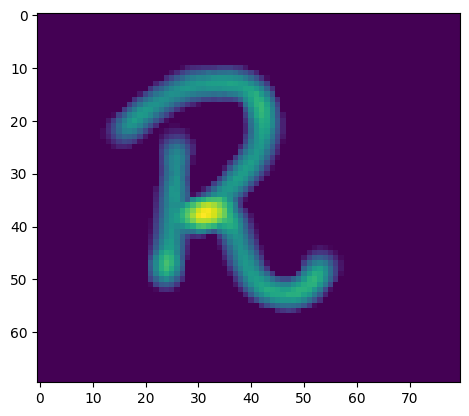

In [25]:
# Visualize the gray_r
plt.imshow(gray_r)

In [28]:
from skimage import morphology

# Obtain the erosed image with binary erosion
eroded_image = morphology.binary_erosion(gray_r)

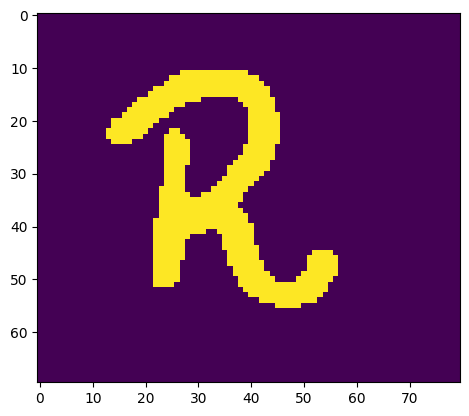

In [29]:
# Visualize eroded image
plt.imshow(eroded_image)

## Dilation in scikit-image

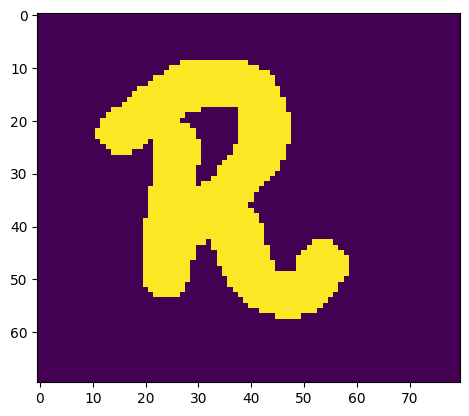

In [30]:
# Obtain the dilated image 
dilated_image = morphology.binary_dilation(gray_r)

# Visualize dilated image
plt.imshow(dilated_image)